## 1. Describe purpose & requirements

- Bài toán: Dự đoán xác suất khách hàng gặp khó khăn trả nợ/vỡ nợ (TARGET = 1), đây là bài toán Phân loại Nhị phân (Binary Classification).

- Yêu cầu mô hình:  

   Logistic Regression: Cần dữ liệu sạch, scaled, không có multicollinearity, không outlier extreme, encoding hợp lý, chuẩn hóa/scaling các biến số liên tục.  

   Tree-based models: Ít nhạy cảm với scaling và outliers (so với tuyến tính), có thể xử lý missing value, encoding categorical tốt.

## 2. Data Collection

- Nguồn: Kaggle - Statistella: Data Analytics Competition.
- Cách lấy: Tải tệp file từ Kaggle.

## 3. Data Combining & Integrating

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
# Merge train và test
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_all = pd.concat([df_train, df_test], sort=False)

## 4. Data Profiling

In [99]:
df_train.info()
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215258 entries, 0 to 215257
Columns: 122 entries, ID to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 200.4+ MB


,ID,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,215258.00000,215258.000000,215258.000000,2.152580e+05,2.152580e+05,215249.000000,2.150840e+05,215258.000000,215258.000000,215258.000000,...,215258.000000,215258.000000,215258.000000,215258.000000,186186.000000,186186.000000,186186.000000,186186.000000,186186.000000,186186.000000
mean,107628.50000,0.080731,0.417076,1.688900e+05,5.994893e+05,27125.796166,5.387622e+05,0.020869,-16037.328169,63865.074181,...,0.008037,0.000562,0.000483,0.000325,0.006494,0.007240,0.034369,0.265761,0.264515,1.894777
std,62139.77646,0.272422,0.723197,2.745586e+05,4.027798e+05,14531.196505,3.698069e+05,0.013834,4369.585911,141314.891126,...,0.089288,0.023702,0.021975,0.018030,0.085314,0.114952,0.206392,0.909921,0.611392,1.866564
min,0.00000,0.000000,0.000000,2.565000e+04,4.500000e+04,1980.000000,4.500000e+04,0.000533,-25201.000000,-17546.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,53814.25000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19688.000000,-2757.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,107628.50000,0.000000,0.000000,1.440000e+05,5.135310e+05,24925.500000,4.500000e+05,0.018850,-15747.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,161442.75000,0.000000,1.000000,2.025000e+05,8.086500e+05,34636.500000,6.795000e+05,0.028663,-12405.250000,-287.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,215257.00000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7673.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,24.000000,8.000000,25.000000


In [100]:
df_train.isnull().sum()


ID                                0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     29072
AMT_REQ_CREDIT_BUREAU_WEEK    29072
AMT_REQ_CREDIT_BUREAU_MON     29072
AMT_REQ_CREDIT_BUREAU_QRT     29072
AMT_REQ_CREDIT_BUREAU_YEAR    29072
Length: 122, dtype: int64

## 5. Data Exploring

### * Các Biến dữ liệu

Đánh giá Khu vực:
- REGION_RATING_CLIENT : Đánh giá của tổ chức về khu vực thường trú của khách hàng (1,2,3) (1: Tốt nhất, 3: Xấu nhất).
- REGION_RATING_CLIENT_W_CITY : Đánh giá của tổ chức về khu vực thường trú, có tính đến thành phố (1,2,3) (1: Tốt nhất, 3: Xấu nhất).

Địa lý :
- REG_REGION_NOT_LIVE_REGION : Cờ cho biết địa chỉ thường trú không khớp với địa chỉ liên hệ (cấp vùng/tỉnh). (1=Khác, 0=Giống)
- REG_REGION_NOT_WORK_REGION : Cờ cho biết địa chỉ thường trú không khớp với địa chỉ làm việc (cấp vùng/tỉnh). (1=Khác, 0=Giống)
- LIVE_REGION_NOT_WORK_REGION : Cờ cho biết địa chỉ liên hệ không khớp với địa chỉ làm việc (cấp vùng/tỉnh). (1=Khác, 0=Giống)
- REG_CITY_NOT_LIVE_CITY : Cờ cho biết địa chỉ thường trú không khớp với địa chỉ liên hệ (cấp thành phố). (1=Khác, 0=Giống)
- REG_CITY_NOT_WORK_CITY : Cờ cho biết địa chỉ thường trú không khớp với địa chỉ làm việc (cấp thành phố). (1=Khác, 0=Giống)
- LIVE_CITY_NOT_WORK_CITY : Cờ cho biết địa chỉ liên hệ không khớp với địa chỉ làm việc (cấp thành phố). (1=Khác, 0=Giống)

(==> Khách hàng thay đổi địa chỉ nhiều → rủi ro cao hơn (tính ổn định thấp).)

Nguồn ngoại vi:
- EXT_SOURCE_1/2/3 : Điểm số chuẩn hóa từ Nguồn dữ liệu bên ngoài 1/2/3 (Thường là điểm tín dụng từ các tổ chức khác).

Thông tin nhà ở:
- FONDKAPREMONT_MODE : Loại tài khoản ngân hàng liên quan đến quỹ bảo trì/cải tạo (ví dụ: liên quan đến nhà chung cư).
- HOUSETYPE_MODE : Loại hình nhà ở.
- TOTALAREA_MODE : Thông tin chuẩn hóa về tòa nhà khách hàng đang sống (diện tích chung).
- WALLSMATERIAL_MODE : Vật liệu tường của nhà ở.
- EMERGENCYSTATE_MODE : Tình trạng khẩn cấp của tòa nhà (ví dụ: cần cải tạo khẩn cấp)( Có/Không)

Vòng tròn xã hội:
- OBS_30_CNT_SOCIAL_CIRCLE / OBS_60_CNT_SOCIAL_CIRCLE : Số lượng quan sát trong vòng tròn xã hội của khách hàng có khả năng mắc nợ quá hạn 30/60 ngày (DPD).
- DEF_30_CNT_SOCIAL_CIRCLE / DEF_60_CNT_SOCIAL_CIRCLE : Số lượng quan sát trong vòng tròn xã hội của khách hàng đã thực sự mắc nợ quá hạn 30/60 ngày (DPD).

( Các biến này đo lường mức độ rủi ro tín dụng của những người xung quanh khách hàng (ví dụ: bạn bè, người cùng địa chỉ) được tổ chức cho vay theo dõi. Đây là một yếu tố quan trọng trong một số mô hình chấm điểm tín dụng, vì hành vi tài chính của những người xung quanh có thể gián tiếp phản ánh môi trường tài chính và rủi ro của người vay.)

In [104]:
feature_list = [
    'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
    'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
    'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
    'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
    'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',
    'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'
]
df_sub = df_train[feature_list].copy()

In [110]:
num_cols = df_sub.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df_sub.select_dtypes(include=["object"]).columns

print("Cột số:", len(num_cols), ":", num_cols)
print("Cột danh mục:", len(cat_cols), ":", cat_cols)

Cột số: 16 : Index(['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'],
      dtype='object')
Cột danh mục: 4 : Index(['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')


### * Check duplicate khách hàng

In [105]:
# Kiểm tra duplicate theo ID
print("Số khách hàng bị duplicate:", df_train['ID'].duplicated().sum())


Số khách hàng bị duplicate: 0


### * Phân tích phân phối các biến (histogram, skew, kurtosis)

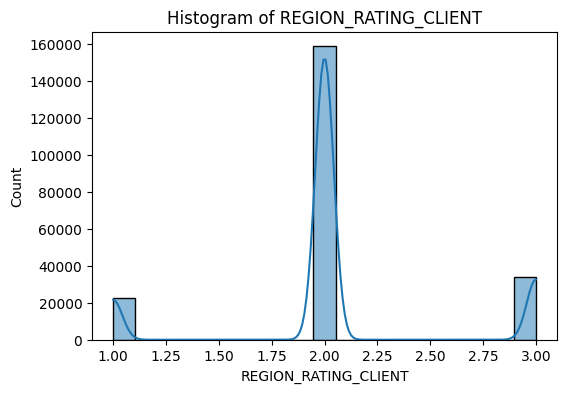

REGION_RATING_CLIENT: Skew=0.09, Kurtosis=0.80
----------------------------------------


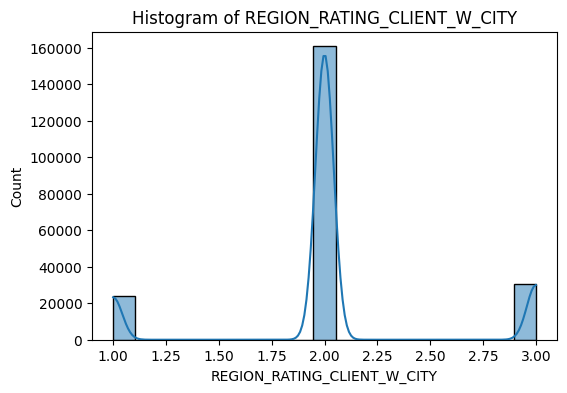

REGION_RATING_CLIENT_W_CITY: Skew=0.06, Kurtosis=0.93
----------------------------------------


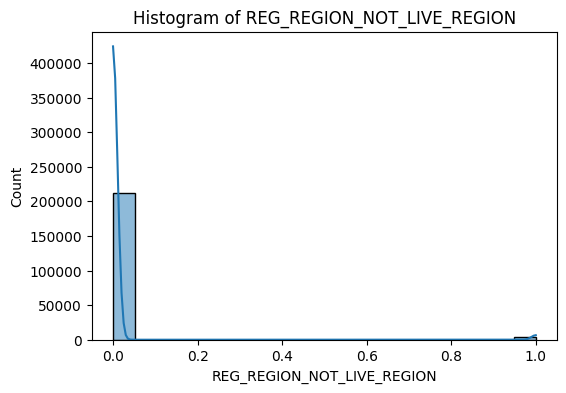

REG_REGION_NOT_LIVE_REGION: Skew=7.92, Kurtosis=60.80
----------------------------------------


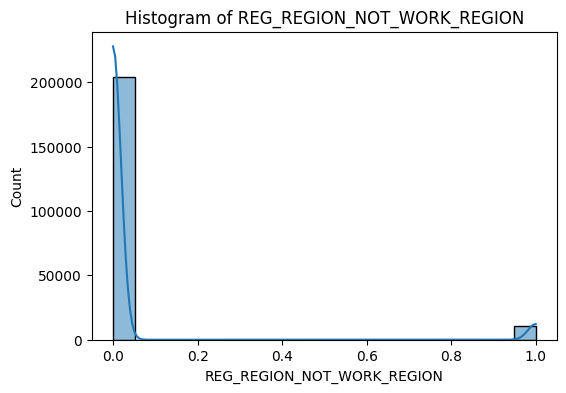

REG_REGION_NOT_WORK_REGION: Skew=4.09, Kurtosis=14.74
----------------------------------------


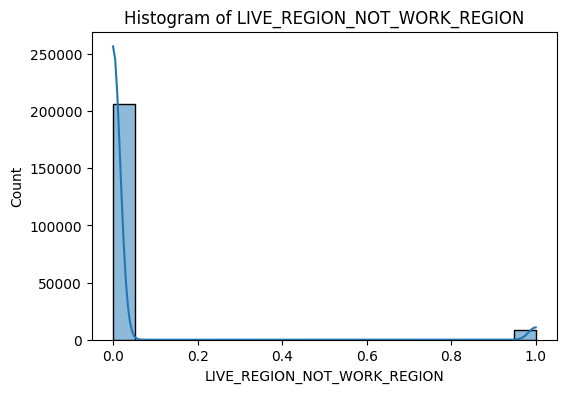

LIVE_REGION_NOT_WORK_REGION: Skew=4.67, Kurtosis=19.78
----------------------------------------


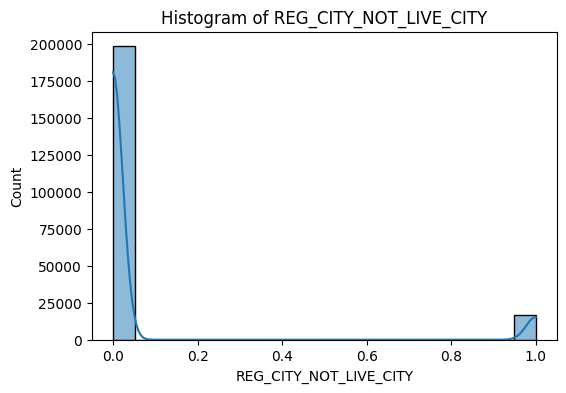

REG_CITY_NOT_LIVE_CITY: Skew=3.14, Kurtosis=7.88
----------------------------------------


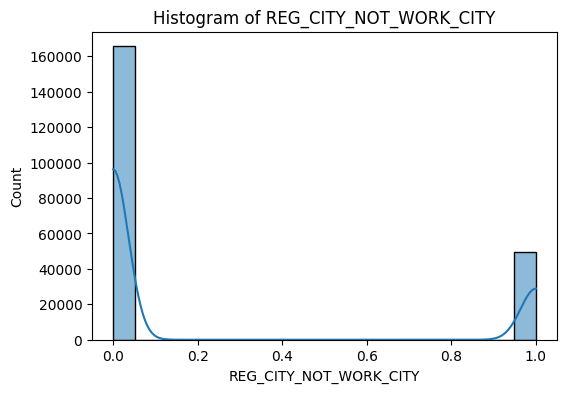

REG_CITY_NOT_WORK_CITY: Skew=1.28, Kurtosis=-0.36
----------------------------------------


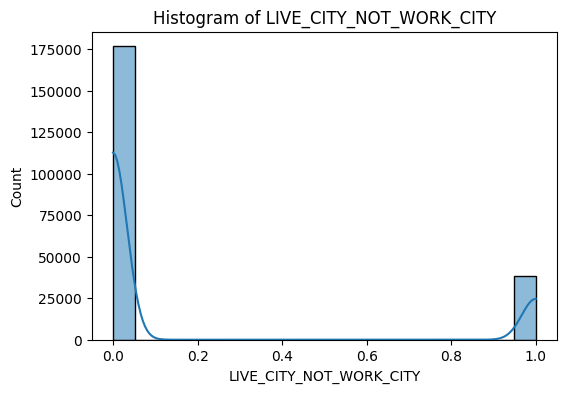

LIVE_CITY_NOT_WORK_CITY: Skew=1.67, Kurtosis=0.79
----------------------------------------


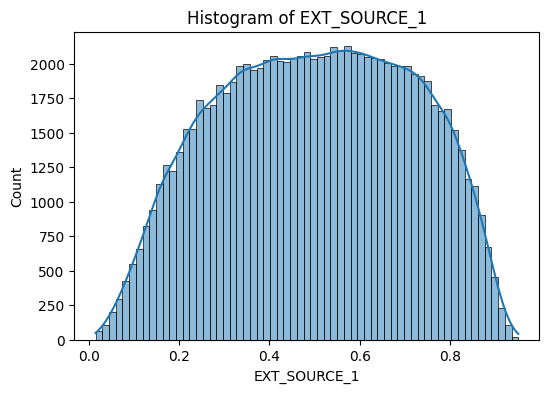

EXT_SOURCE_1: Skew=-0.07, Kurtosis=-0.97
----------------------------------------


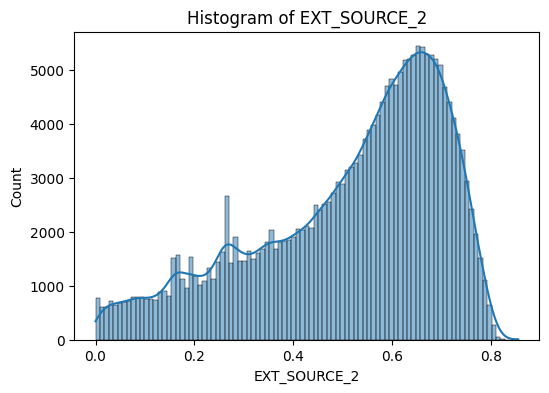

EXT_SOURCE_2: Skew=-0.79, Kurtosis=-0.28
----------------------------------------


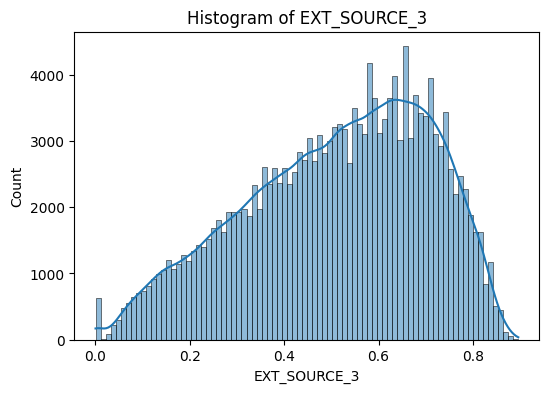

EXT_SOURCE_3: Skew=-0.41, Kurtosis=-0.65
----------------------------------------


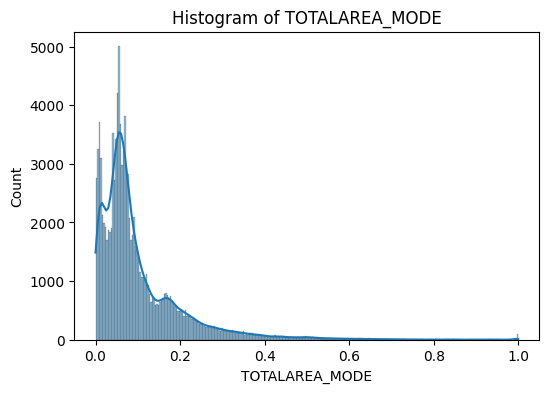

TOTALAREA_MODE: Skew=2.79, Kurtosis=12.10
----------------------------------------


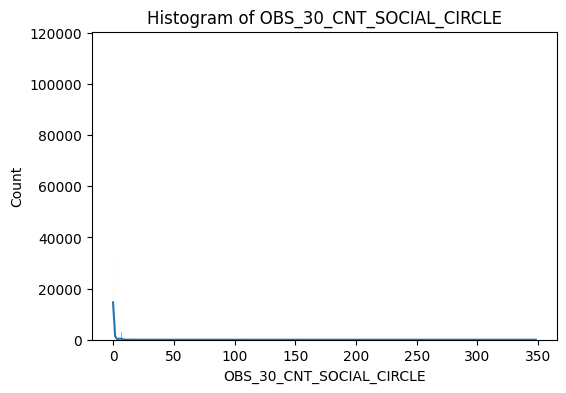

OBS_30_CNT_SOCIAL_CIRCLE: Skew=15.67, Kurtosis=1920.41
----------------------------------------


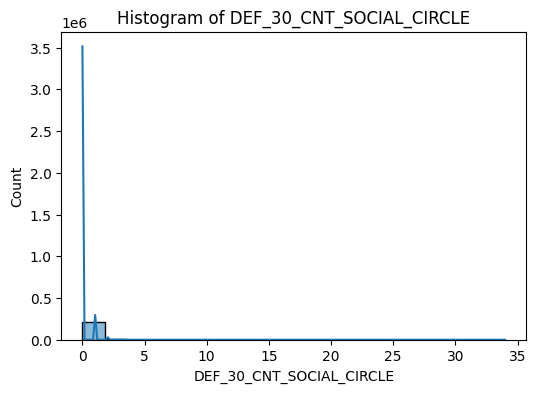

DEF_30_CNT_SOCIAL_CIRCLE: Skew=5.69, Kurtosis=168.46
----------------------------------------


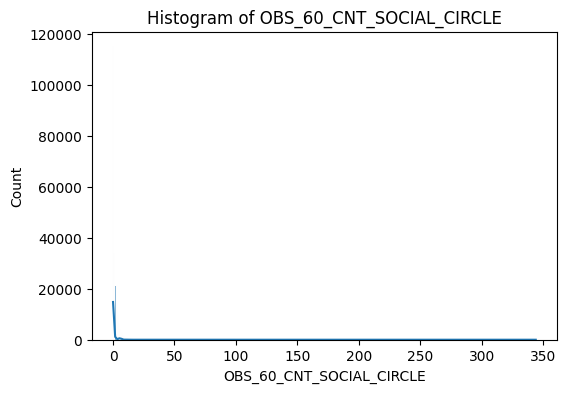

OBS_60_CNT_SOCIAL_CIRCLE: Skew=15.57, Kurtosis=1899.89
----------------------------------------


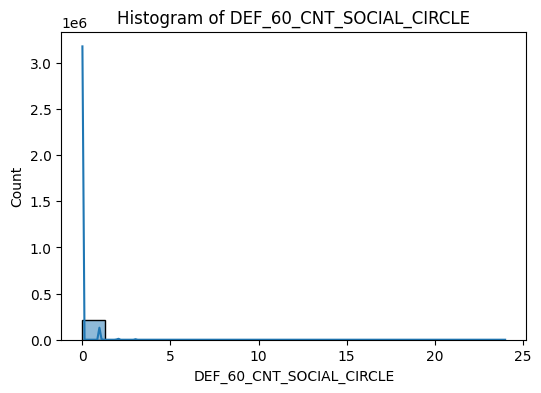

DEF_60_CNT_SOCIAL_CIRCLE: Skew=5.60, Kurtosis=111.58
----------------------------------------


In [111]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df_sub[col].dropna(), kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()
    skewness = df_sub[col].skew()
    kurtosis = df_sub[col].kurtosis()
    print(f"{col}: Skew={skewness:.2f}, Kurtosis={kurtosis:.2f}")
    # Kiểm tra normality (Shapiro test nếu số lượng < 5000)
    if df_sub[col].dropna().shape[0] < 5000:
        from scipy.stats import shapiro
        stat, p = shapiro(df_sub[col].dropna())
        print(f"Shapiro-Wilk p-value: {p:.4f}")
    print('-'*40)

### * Kiểm tra missing data, phân nhóm theo tỷ lệ

In [108]:
missing = df_sub.isnull().mean().sort_values(ascending=False)
print("Tỷ lệ missing value từng biến (%):\n", (missing*100).round(2))

# Phân nhóm theo threshold
print("Biến missing < 5%:", missing[missing < 0.05].index.tolist())
print("Biến missing 5-30%:", missing[(missing >= 0.05) & (missing < 0.3)].index.tolist())
print("Biến missing > 30%:", missing[missing >= 0.3].index.tolist())

Tỷ lệ missing value từng biến (%):
 FONDKAPREMONT_MODE             68.39
EXT_SOURCE_1                   56.41
WALLSMATERIAL_MODE             50.87
HOUSETYPE_MODE                 50.22
TOTALAREA_MODE                 48.29
EMERGENCYSTATE_MODE            47.41
EXT_SOURCE_3                   19.86
OBS_60_CNT_SOCIAL_CIRCLE        0.33
DEF_30_CNT_SOCIAL_CIRCLE        0.33
OBS_30_CNT_SOCIAL_CIRCLE        0.33
DEF_60_CNT_SOCIAL_CIRCLE        0.33
EXT_SOURCE_2                    0.22
REGION_RATING_CLIENT_W_CITY     0.00
LIVE_CITY_NOT_WORK_CITY         0.00
REG_CITY_NOT_WORK_CITY          0.00
REG_CITY_NOT_LIVE_CITY          0.00
LIVE_REGION_NOT_WORK_REGION     0.00
REG_REGION_NOT_WORK_REGION      0.00
REG_REGION_NOT_LIVE_REGION      0.00
REGION_RATING_CLIENT            0.00
dtype: float64
Biến missing < 5%: ['OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'REGION_RATING_CLIENT_W_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'RE

Có 3 loại missing data:
- MCAR (Missing Completely At Random): Thiếu ngẫu nhiên, không liên quan đến giá trị nào khác.
- MAR (Missing At Random): Thiếu liên quan đến các biến khác.
- MNAR (Missing Not At Random): Thiếu liên quan đến chính biến đó.

Đề xuất phương pháp xử lý phù hợp: loại bỏ, điền giá trị trung bình/median/mode, hoặc gắn nhãn riêng.

### * Check và xử lý outliers (IQR)

Vẽ boxplot cho từng biến số để xác định outliers. Sử dụng phương pháp IQR để tính ngưỡng và đếm số lượng outlier.

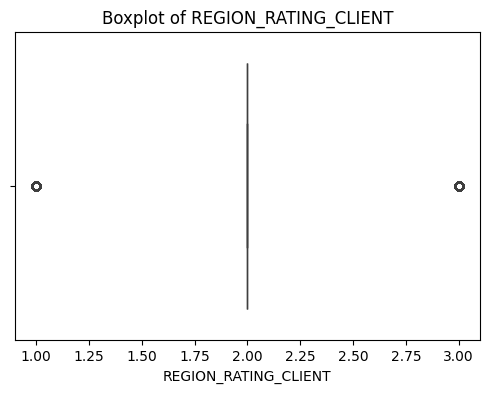

REGION_RATING_CLIENT: Số outlier = 56422 (26.21%)


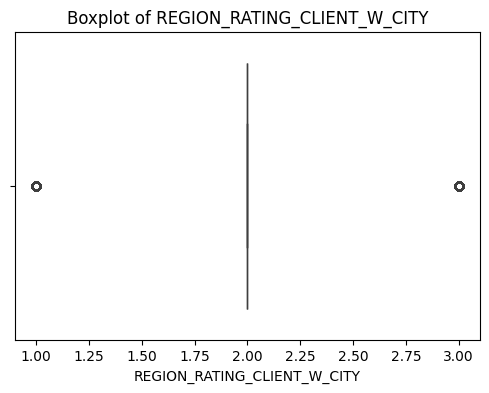

REGION_RATING_CLIENT_W_CITY: Số outlier = 54627 (25.38%)


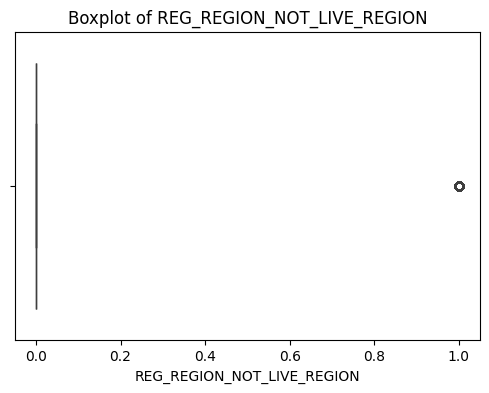

REG_REGION_NOT_LIVE_REGION: Số outlier = 3272 (1.52%)


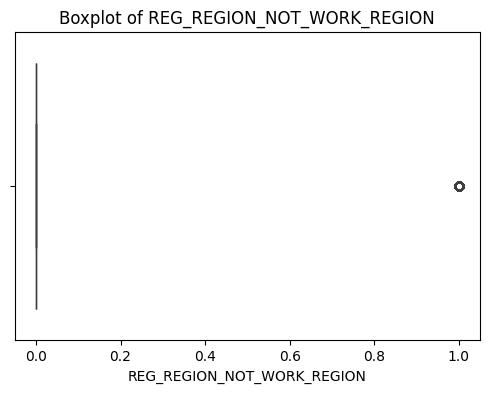

REG_REGION_NOT_WORK_REGION: Số outlier = 10933 (5.08%)


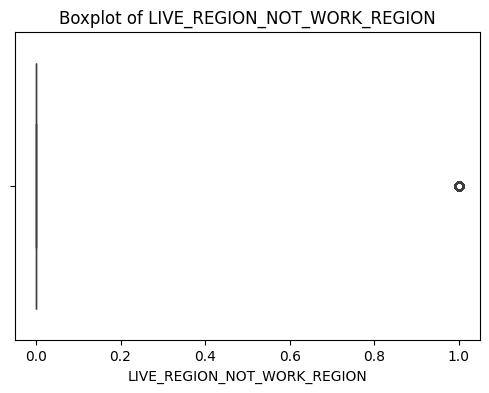

LIVE_REGION_NOT_WORK_REGION: Số outlier = 8700 (4.04%)


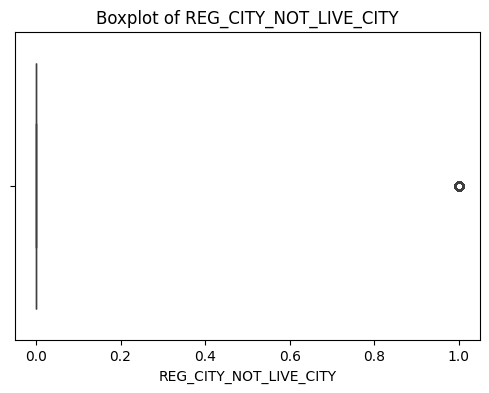

REG_CITY_NOT_LIVE_CITY: Số outlier = 16817 (7.81%)


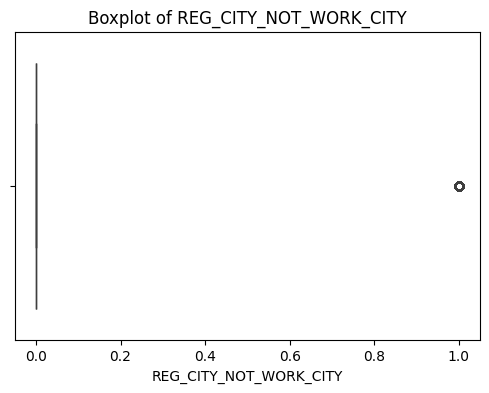

REG_CITY_NOT_WORK_CITY: Số outlier = 49636 (23.06%)


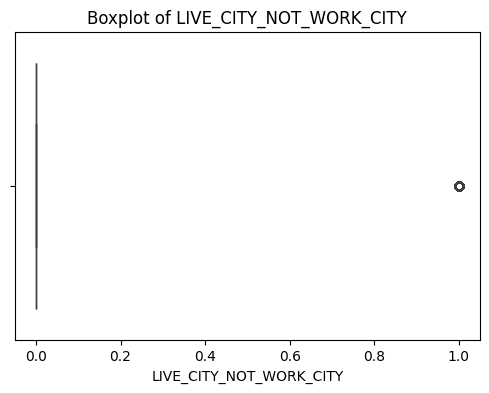

LIVE_CITY_NOT_WORK_CITY: Số outlier = 38653 (17.96%)


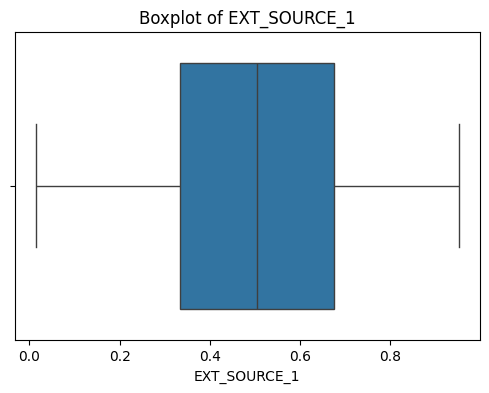

EXT_SOURCE_1: Số outlier = 0 (0.00%)


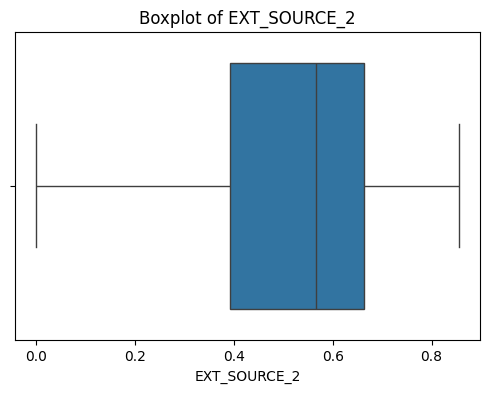

EXT_SOURCE_2: Số outlier = 0 (0.00%)


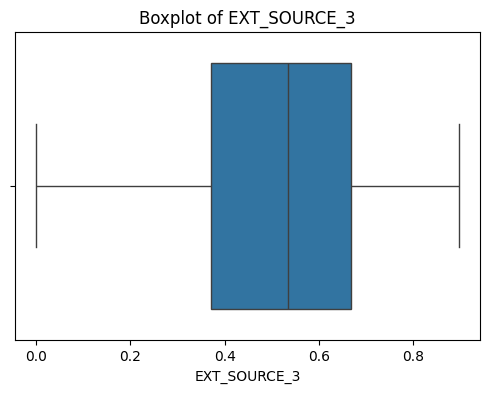

EXT_SOURCE_3: Số outlier = 0 (0.00%)


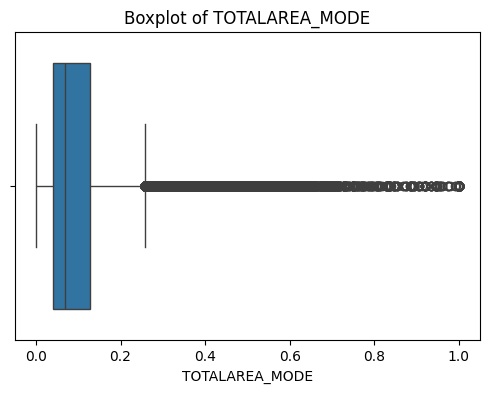

TOTALAREA_MODE: Số outlier = 8454 (7.59%)


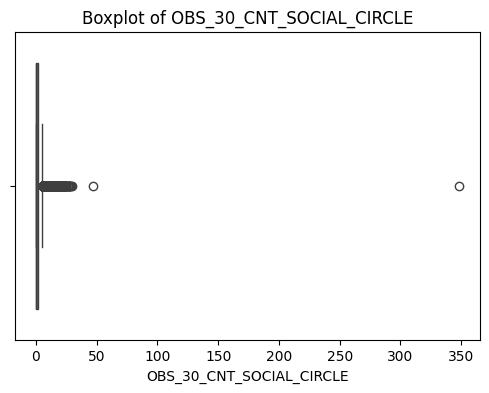

OBS_30_CNT_SOCIAL_CIRCLE: Số outlier = 13940 (6.50%)


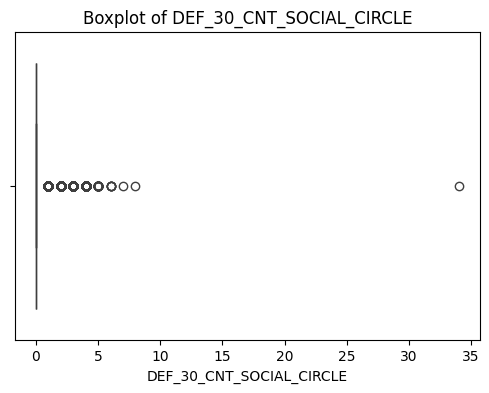

DEF_30_CNT_SOCIAL_CIRCLE: Số outlier = 24685 (11.51%)


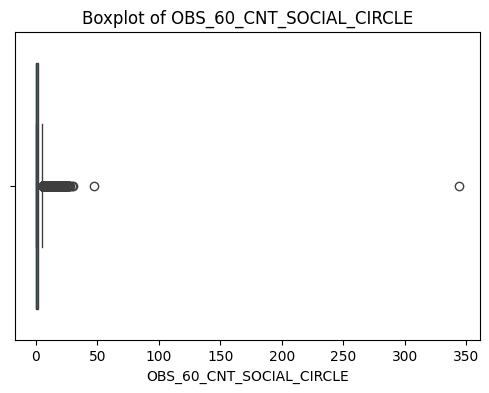

OBS_60_CNT_SOCIAL_CIRCLE: Số outlier = 13661 (6.37%)


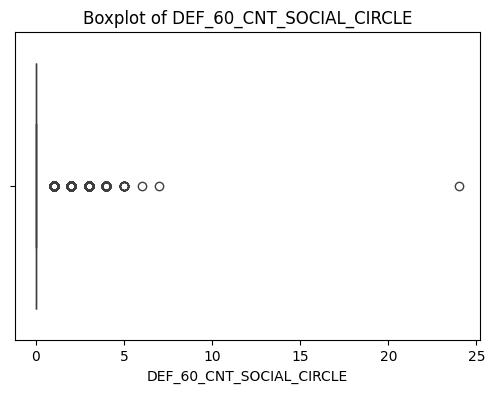

DEF_60_CNT_SOCIAL_CIRCLE: Số outlier = 18046 (8.41%)


In [116]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df_sub[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.show()
    
    q1 = df_sub[col].quantile(0.25)
    q3 = df_sub[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = df_sub[(df_sub[col] < lower) | (df_sub[col] > upper)][col]
    outlier_count = outliers.shape[0]
    outlier_pct = outlier_count / df_sub[col].dropna().shape[0] * 100
    print(f"{col}: Số outlier = {outlier_count} ({outlier_pct:.2f}%)")

### * Visualize quan hệ các features với target label

Trực quan hóa mối quan hệ giữa từng biến với nhãn mục tiêu (TARGET). Sử dụng boxplot cho biến số, countplot cho biến danh mục. Việc này giúp phát hiện các biến có phân phối khác biệt giữa các nhóm target, hỗ trợ lựa chọn feature cho mô hình.

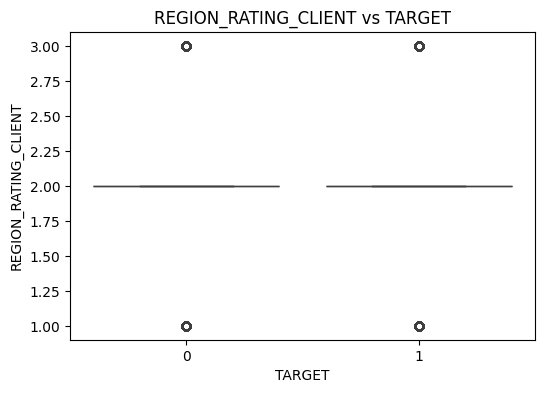

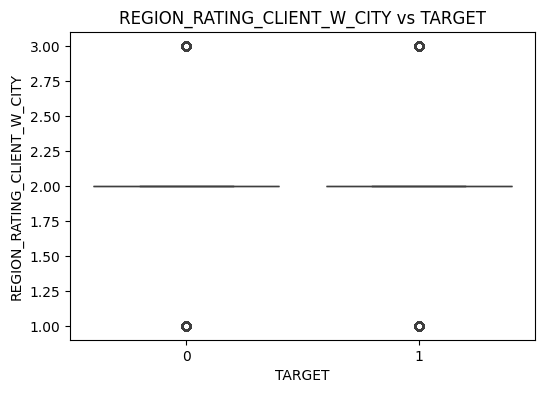

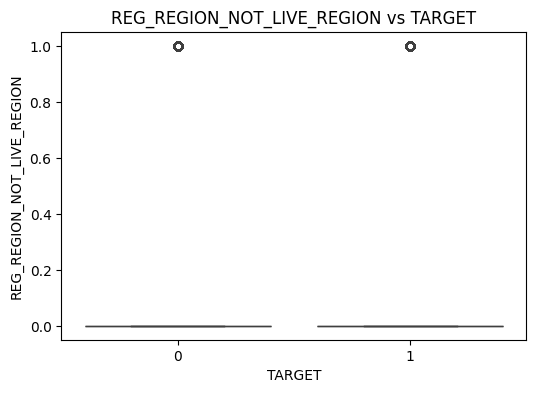

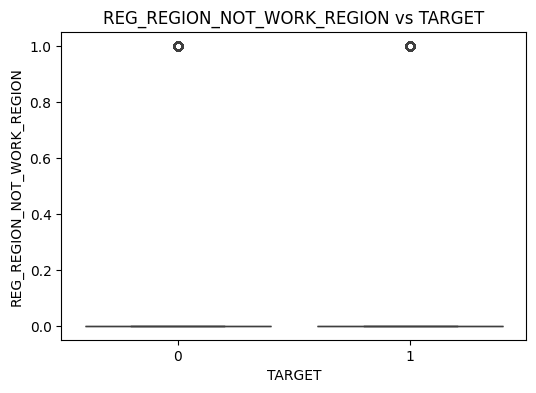

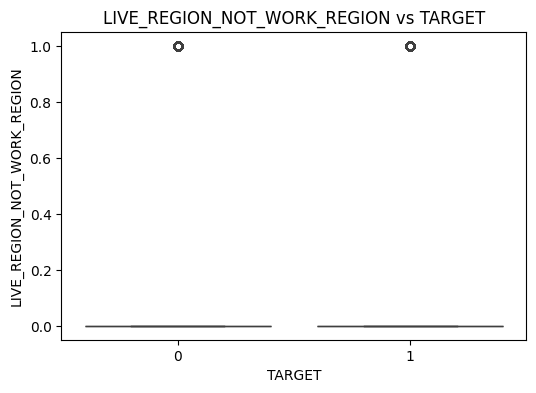

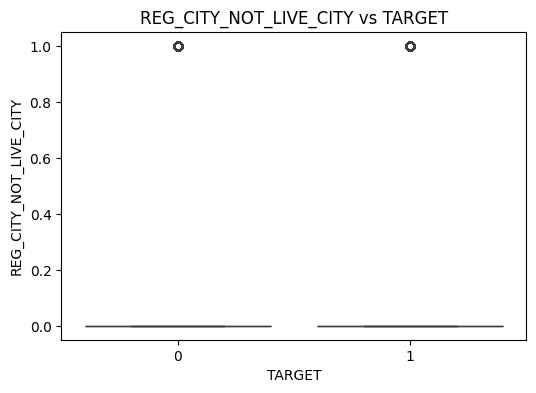

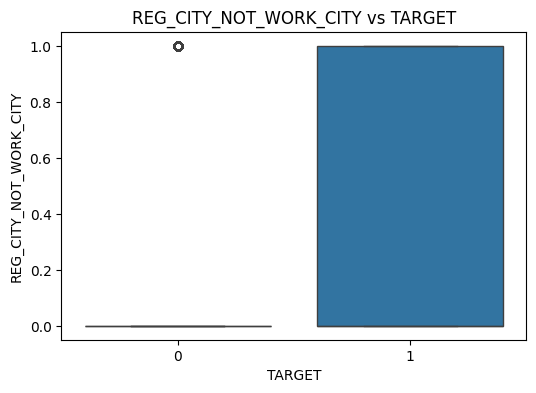

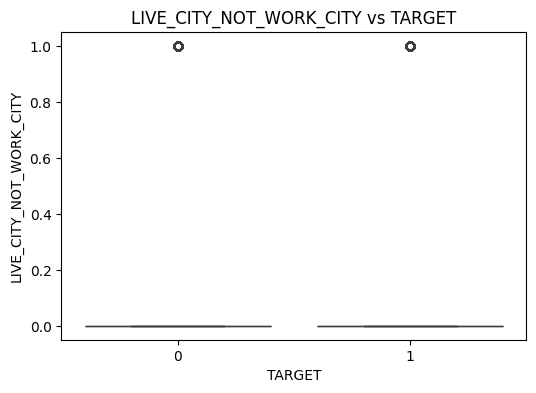

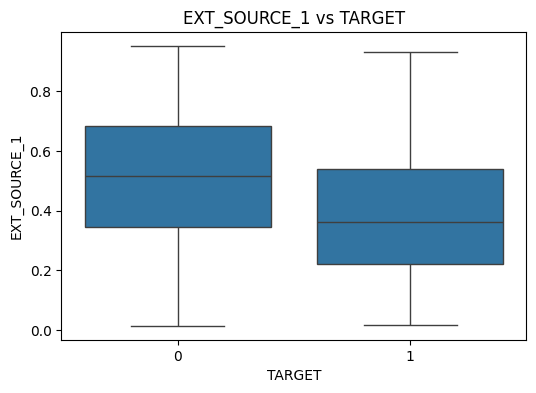

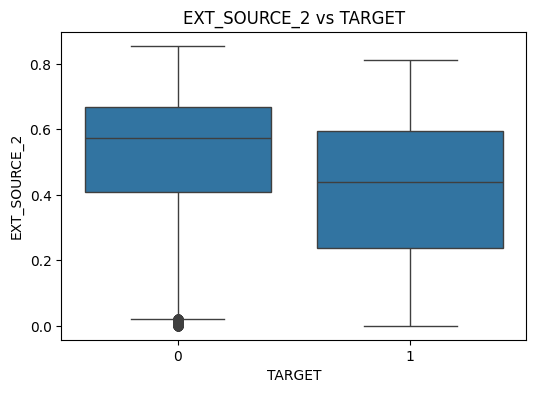

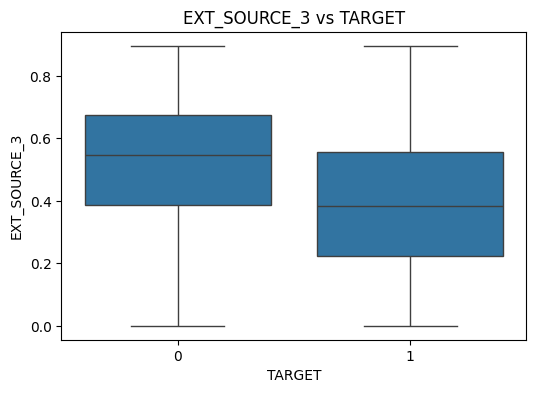

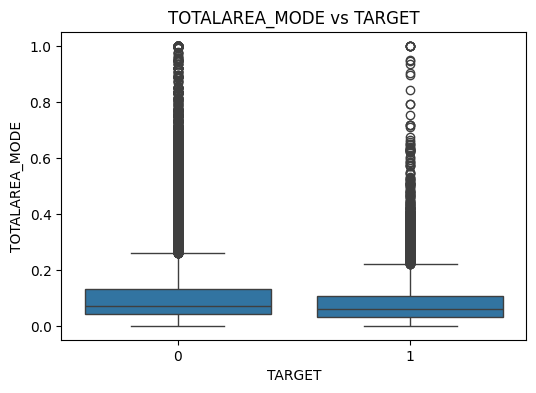

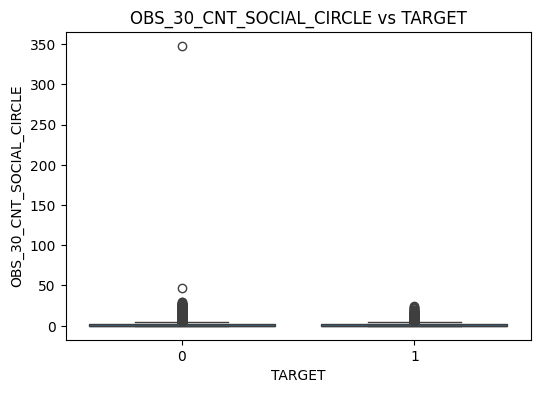

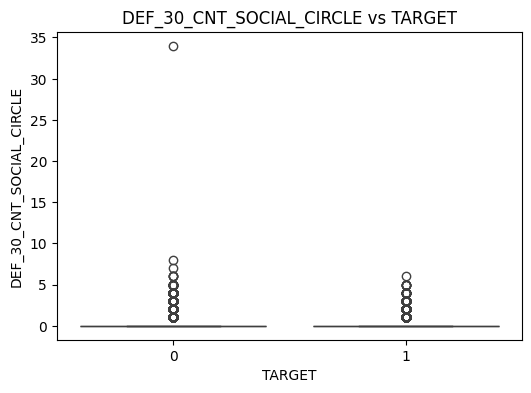

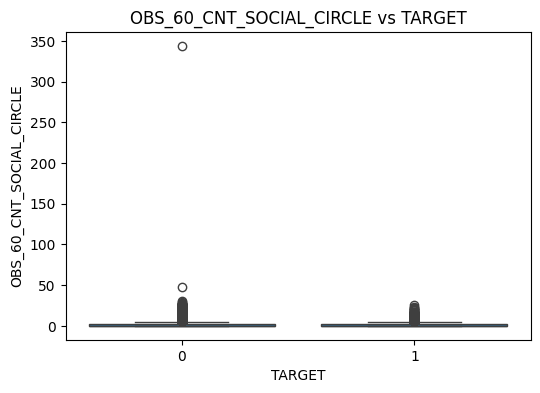

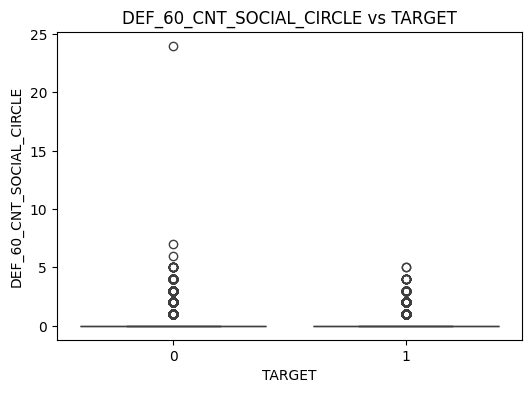

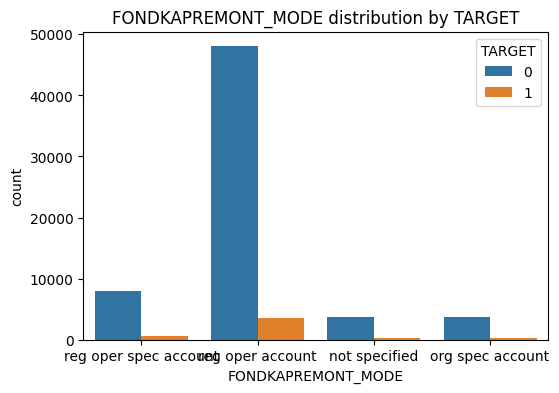

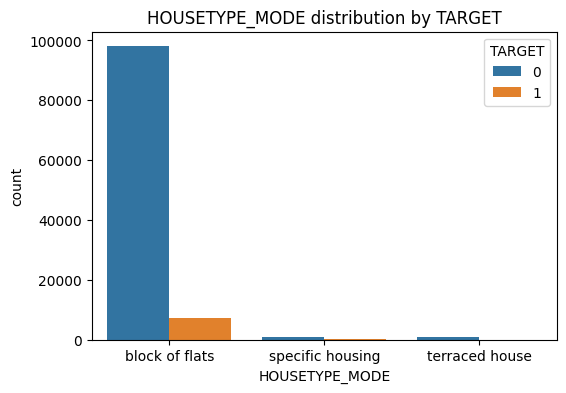

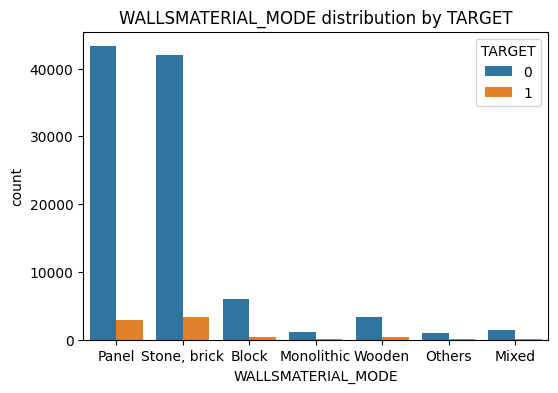

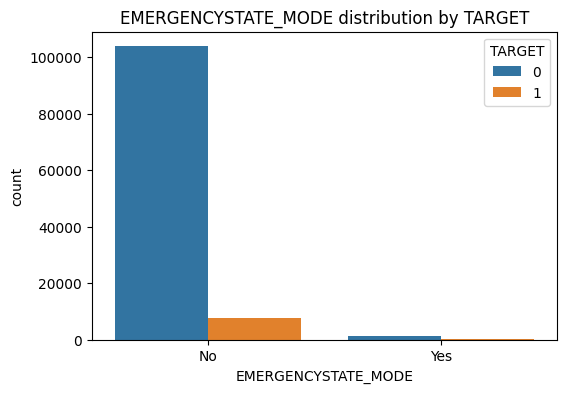

In [117]:
# Biến số: boxplot theo TARGET
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_train['TARGET'], y=df_train[col])
    plt.title(f'{col} vs TARGET')
    plt.show()

# Biến danh mục: countplot theo TARGET
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df_train[col], hue=df_train['TARGET'])
    plt.title(f'{col} distribution by TARGET')
    plt.show()

### * Correlation matrix giữa các biến số và TARGET

Tính toán và trực quan hóa ma trận tương quan giữa các biến số và TARGET. Phân nhóm các biến theo mức độ tương quan (mạnh, trung bình, yếu) để đánh giá khả năng dự báo và nguy cơ multicollinearity. Các biến có tương quan mạnh với TARGET thường hữu ích cho mô hình, nhưng cần kiểm tra multicollinearity giữa các biến số.

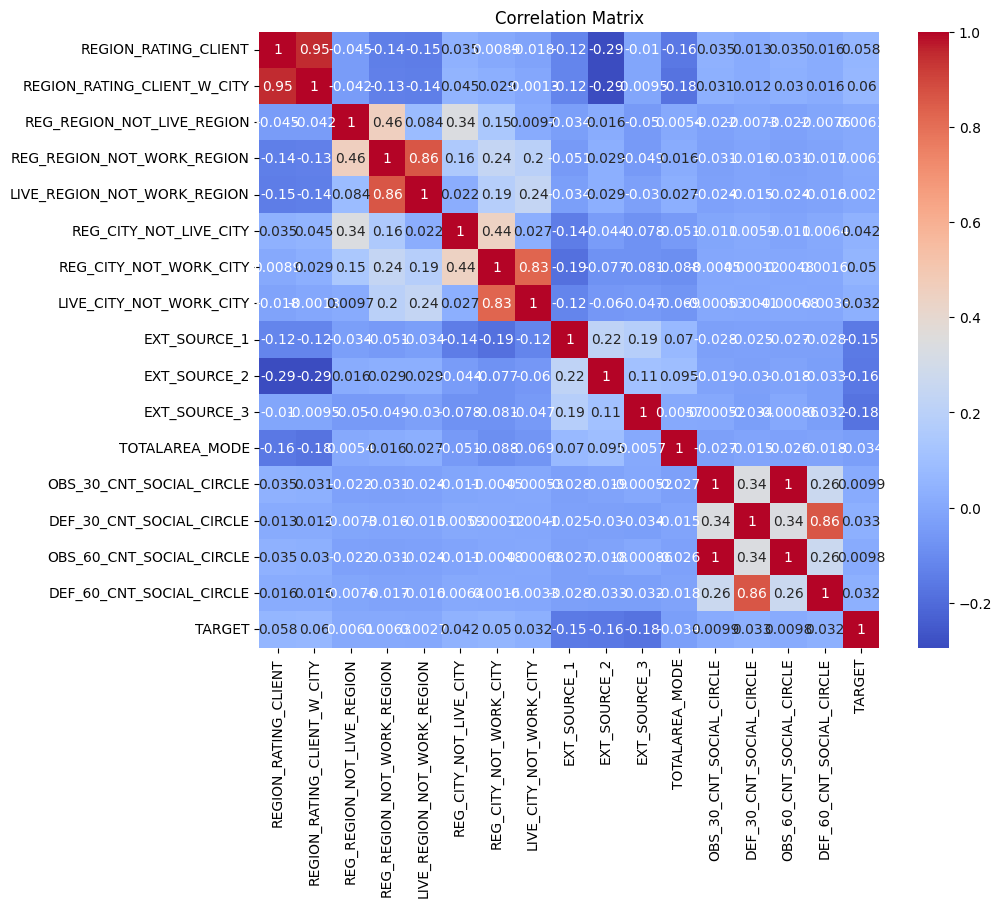

Biến có tương quan mạnh với TARGET (>|0.3|): []
Biến có tương quan trung bình (0.1-0.3): ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
Biến có tương quan yếu (<0.1): ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']


In [119]:
df_sub['TARGET'] = df_train['TARGET']  

corr = df_sub[list(num_cols) + ['TARGET']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Phân nhóm biến theo mức độ tương quan với TARGET
target_corr = corr['TARGET'].drop('TARGET')
print("Biến có tương quan mạnh với TARGET (>|0.3|):", target_corr[abs(target_corr) > 0.3].index.tolist())
print("Biến có tương quan trung bình (0.1-0.3):", target_corr[(abs(target_corr) > 0.1) & (abs(target_corr) <= 0.3)].index.tolist())
print("Biến có tương quan yếu (<0.1):", target_corr[abs(target_corr) <= 0.1].index.tolist())